In [1]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# import dataset
data = pd.read_csv('../Datasets/insurance.csv')

In [3]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# check for missing values
data.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# fill missing values with average values from bmi column
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [6]:
# check for missing values again
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

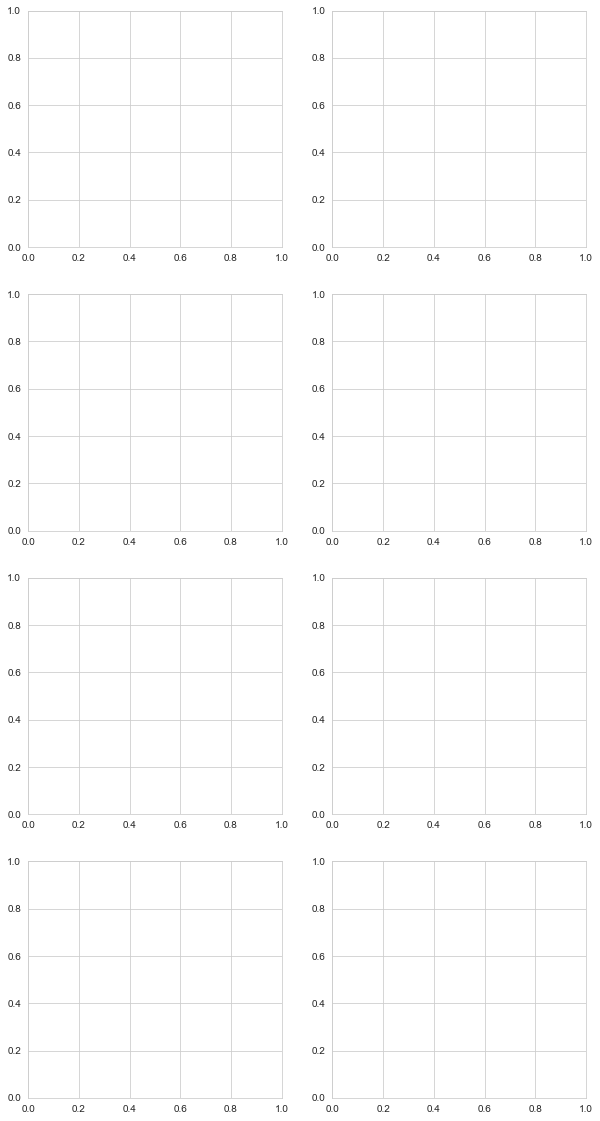

In [7]:
# visualize the data
figure, ax = plt.subplots(4, 2, figsize=(10, 20))

Text(0.5, 1.0, 'Charges')

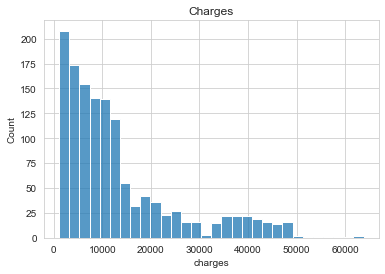

In [20]:
sns.histplot(data['charges']).set_title('Charges')

Text(0.5, 1.0, 'Age')

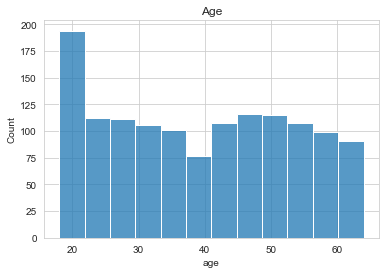

In [21]:
sns.histplot(data['age']).set_title('Age')

Text(0.5, 1.0, 'BMI')

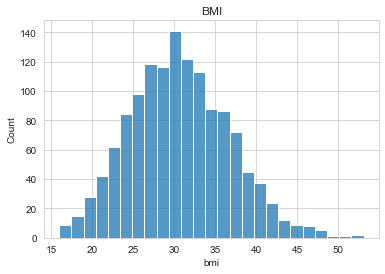

In [22]:
sns.histplot(data['bmi']).set_title('BMI')

Text(0.5, 1.0, 'Children')

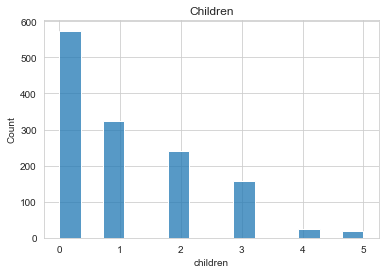

In [23]:
sns.histplot(data['children']).set_title('Children')

<AxesSubplot:xlabel='sex', ylabel='count'>

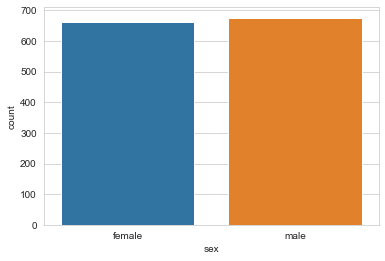

In [12]:
sns.countplot(x = data['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

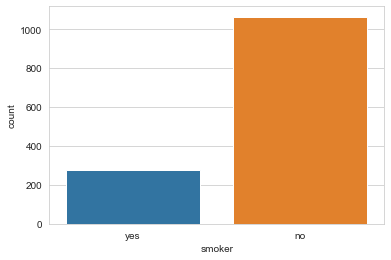

In [13]:
sns.countplot(x = data['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

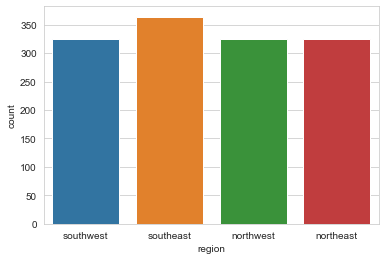

In [14]:
sns.countplot(x = data['region'])

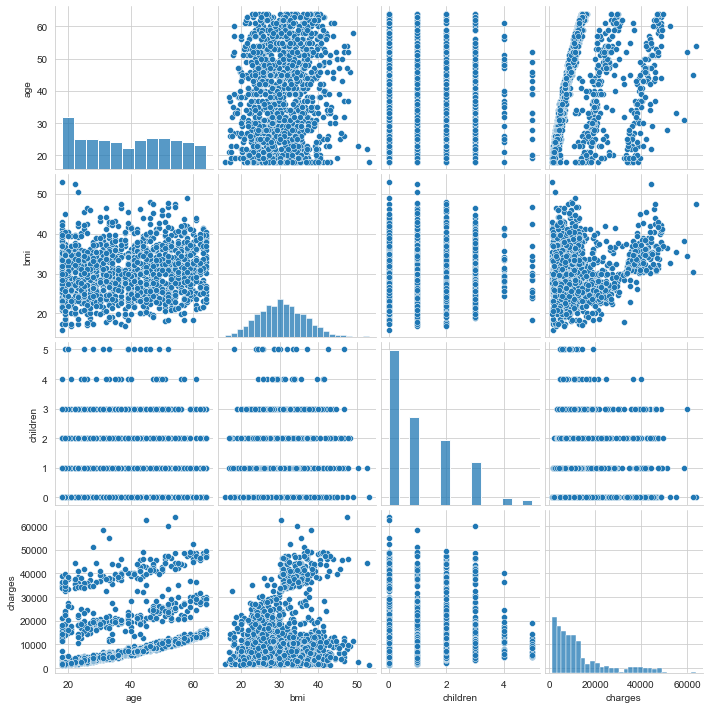

In [15]:
sns.pairplot(data)

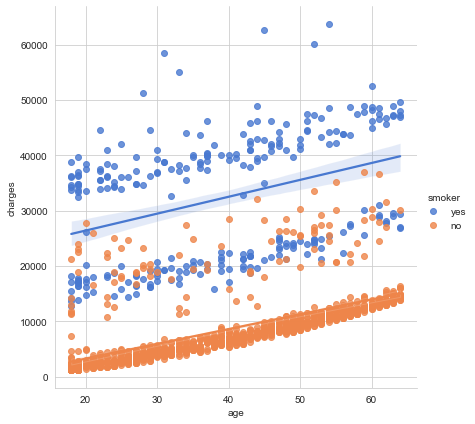

In [16]:
# smokers vs non-smokers on age vs charges
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette="muted", height=6, aspect=1)

In [17]:
# correlation
data.corr()

,age,bmi,children,charges
age,1.000000,0.109090,0.042469,0.299008
bmi,0.109090,1.000000,0.014688,0.193817
children,0.042469,0.014688,1.000000,0.067998
charges,0.299008,0.193817,0.067998,1.000000


<AxesSubplot:>

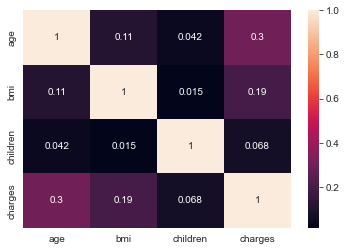

In [18]:
sns.heatmap(data.corr(), annot=True)

In [24]:
# convert categorical data to numerical
region = data['region']
region_encoded, region_categories = pd.factorize(region)
factor_region_mapping = dict(zip(region_categories, region_encoded))

In [25]:
print('Pandas factorize function for label encoding with series')
print(region[:10])
print(region_categories)
print(region_encoded[:10])
print(factor_region_mapping)

Pandas factorize function for label encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')
[0 1 1 2 2 1 1 2 3 2]
{'southwest': 0, 'southeast': 1, 'northwest': 1, 'northeast': 2}


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

In [34]:
# label encoder: le

# le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex")
print(le_sex_mapping)
print(sex[:10])

Sklearn label encoder results for sex
{0: 0, 1: 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [37]:
sex.head(5)

,sex
0,0
1,1
2,1
3,1
4,1


In [35]:
# le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [36]:
smoker.head(5)

,smoker
0,1
1,0
2,0
3,0
4,0


In [38]:
region = data.iloc[:,5:6].values
ohe = OneHotEncoder()

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['region_northwest', 'region_northeast', 'region_southwest', 'region_southeast']
print("Sklearn one g=hot encoder results for region: ")
print(region[:10])

Sklearn one g=hot encoder results for region: 
   region_northwest  region_northeast  region_southwest  region_southeast
0               0.0               0.0               0.0               1.0
1               0.0               0.0               1.0               0.0
2               0.0               0.0               1.0               0.0
3               0.0               1.0               0.0               0.0
4               0.0               1.0               0.0               0.0
5               0.0               0.0               1.0               0.0
6               0.0               0.0               1.0               0.0
7               0.0               1.0               0.0               0.0
8               1.0               0.0               0.0               0.0
9               0.0               1.0               0.0               0.0


In [59]:
# splitting the data into training and testing data

X_num = data[['age', 'bmi', 'children']].copy()

# take encoded data and add to numerical data
X_final = pd.concat([X_num, region, sex, smoker], axis=1)

# y will be charges col from original dataset
y_final = data[['charges']].copy()

# perform test, train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

In [60]:
# view the results
X_train.shape

(896, 9)

In [61]:
X_test.shape

(442, 9)

In [62]:
y_train.shape

(896, 1)

In [63]:
y_test.shape

(442, 1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [65]:
# feature scaling (standardization: x-mean(x)/std(x))
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [66]:
print(X_train)

[[-1.03606235  0.61468414 -0.91008919 ... -0.58766091 -0.98669564
  -0.4996512 ]
 [-1.46484381  0.64957783  0.7540739  ...  1.70166159 -0.98669564
   2.00139616]
 [-0.82167162  0.37367425  1.58615545 ... -0.58766091  1.01348375
  -0.4996512 ]
 ...
 [ 0.03589131 -0.91171181 -0.91008919 ... -0.58766091  1.01348375
  -0.4996512 ]
 [-1.46484381  0.78428369 -0.91008919 ... -0.58766091  1.01348375
  -0.4996512 ]
 [-0.46435373 -1.97962095 -0.07800765 ...  1.70166159 -0.98669564
  -0.4996512 ]]


In [67]:
print(X_test)

[[ 0.89345423 -0.08075516 -0.07800765 ...  1.70166159  1.01348375
  -0.4996512 ]
 [ 0.53613634 -0.21546103 -0.07800765 ... -0.58766091 -0.98669564
  -0.4996512 ]
 [ 0.60759992  1.60144516  0.7540739  ... -0.58766091  1.01348375
   2.00139616]
 ...
 [ 0.03589131  0.3371576  -0.07800765 ... -0.58766091  1.01348375
   2.00139616]
 [-1.03606235 -0.63256231  1.58615545 ...  1.70166159  1.01348375
  -0.4996512 ]
 [-1.39338023 -0.62607047 -0.07800765 ... -0.58766091 -0.98669564
   2.00139616]]


linear regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression().fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [71]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")
print(f"lr train score %3f, lr test score: %3f" % (lr.score(X_train, y_train), lr.score(X_test, y_test)))

lr.coef_: [[ 3.61962453e+03  1.96058340e+03  6.77239111e+02  6.99112632e+16
   7.09469447e+16  7.37415213e+16  7.24525037e+16 -5.53315977e+01
   9.30885466e+03]]
lr.intercept_: [13144.06670799]
lr train score 0.728308, lr test score: 0.785410


Text(0.5, 1.0, 'Training Charges')

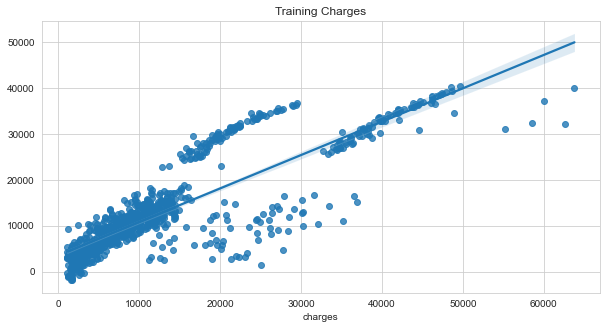

In [77]:
plt.figure(figsize=(10, 5))
sns.regplot(x = y_train, y = y_train_pred).set_title('Training Charges')

polynomial regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
pl = PolynomialFeatures(degree=2)
X_train_pl = pl.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_train_pl, y_final, test_size=0.33, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

pl_lr = LinearRegression().fit(X_train, y_train)
y_train_pred = pl_lr.predict(X_train)
y_test_pred = pl_lr.predict(X_test)

In [82]:
# print score
print('poly train score %3f, poly test score: %3f' % (pl_lr.score(X_train, y_train), pl_lr.score(X_test, y_test)))

poly train score 0.769169, poly test score: 0.802994


support vector regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [ ]:
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))